# Entegable 1- Métricas, Árboles de decisión y Random Forest

Francisco Javier Mercader Martínez

## Machine Learning. Grado en Ciencia de datos

Los siguientes ejercicios tienen que ser entregados dentro de las dos horas de prácticas. Como realizar el entregable:


-   La realización se debe de hacer de forma  **INDIVIDUAL**
-   Se debe de enviar un notebook con el código y las explicaciones, comentarios, análisis y justificaciones en Markdown.
-   Reproducibilidad:
    -   Se debe de establecer una variable semilla con un número al inicio, esta variables será la que se utilice para el np.random_seed y para el random_state.
    -   Las bases de datos se cargan con rutas relativas.
-   El notebook se debe de subir a la tarea del aula virtual creada antes de la finalización de la hora de clase. (Ver tarea y fecha de cierre)

### DATASET

El dataset obesidad.csv describe los siguientes atributos:
- GENERO: Género de la persona. 0: Hombre, 1:Mujer
- EDAD: Edad en años
- ALTURA: ALtura de la persona en metros
- PESO: Peso de la persona en kg
- HISTORIAL: Si hay antecedentes de obesidad en la familia. 0:no, 1:si
- CBASURA: Si come comida basura. 0:no, 1:si
- NVEGETALES: Media de veces que come verdura durante la semana
- NCOMIDAS: Media de comidas que hace al día
- FUMAS: Si el paciente fuma. 0:no, 1:si
- LAGUA: Media de Litros de agua que bebe al día
- CCALORIAS: Control de las calorias en las comidas. 0:no, 1:si
- EJERCICIO: Media de veces que hace ejercicio a la semana
- TECNOLOGIA: Media de días que usa tecnología a la semana
- ALCOHOL: Frecuencia con la que toma alcohol no, frecuently, sometimes
- OBESIDAD: Si el paciente tiene obesidad. 0:no, 1:si



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

semilla = 123
np.random.seed(semilla)

### Ejercicio 1

Utilizando el dataset 'OBESIDAD.csv', crea el árbol de decisión que consideres para realizar la regresión de la columna PESO. Para ello, sigue los siguientes pasos:
   1. Carga el dataset (conjunto de datos) y revisa los tipos de datos de los atributos del dataset, analiza si es necesario transformar alguno. En caso de ser necesario realiza la transformación
   2. Crea un hold-out (train-test) 85-15
   3. Crea un árbol de decisión y establece si es necesario realizar poda o no.
   4. Para el árbol sin podar calcula las métricas conocidas para analizar si la estimación de la columna es buena o mala en el conjunto de test. Mínimo calcular 2 métricas. Tras el cálculo de las métricas analiza los resultados. 
   5. Para el árbol con poda, si fuera necesario podar, calcula las métricas conocidas para analizar si la predicción es buena o mala en el conjunto de test. Mínimo calcular 2 métricas. Tras el cálculo de las métricas analiza los resultados. 
   6. Compara los resultados del árbol podado y del árbol sin podar.
   7. El árbol de decisión, ¿es un buen modelo para predecir el peso de un paciente? Razona la respuesta. Dibuja el árbol que mejor resultado haya dado.



In [2]:
# Apartado 1
df = pd.read_csv("OBESIDAD.csv", sep=";")

print(df.dtypes)

# La columna "ALCOHOL" es de tipo categórica, vamos a corregirla

encoder = LabelEncoder()

df['ALCOHOL'] = encoder.fit_transform(df["ALCOHOL"])

df

GENERO          int64
EDAD            int64
ALTURA        float64
PESO          float64
HISTORIAL       int64
CBASURA         int64
NVEGETALES    float64
NCOMIDAS      float64
FUMAS           int64
LAGUA         float64
CCALORIAS     float64
EJERCICIO     float64
TECNOLOGIA    float64
ALCOHOL        object
OBESIDAD        int64
dtype: object


,GENERO,EDAD,ALTURA,PESO,HISTORIAL,CBASURA,NVEGETALES,NCOMIDAS,FUMAS,LAGUA,CCALORIAS,EJERCICIO,TECNOLOGIA,ALCOHOL,OBESIDAD
0,1,21,1.62,64.000000,1,0,2.00,3.00,0,2.00,0.0,0.00,1.000000,3,0
1,1,21,1.52,56.000000,1,0,3.00,3.00,1,3.00,1.0,3.00,0.000000,2,0
2,0,23,1.80,77.000000,1,0,2.00,3.00,0,2.00,0.0,2.00,1.000000,1,0
3,0,27,1.80,87.000000,0,0,3.00,3.00,0,2.00,0.0,2.00,0.000000,1,1
4,0,29,1.62,53.000000,0,1,2.00,3.00,0,2.00,0.0,0.00,0.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,0,31,1.65,102.583895,1,1,2.92,2.14,0,1.18,0.0,0.96,0.636289,3,1
1142,0,20,1.66,105.580491,1,1,2.72,1.44,0,1.59,0.0,0.03,1.122118,3,1
1143,0,21,1.64,101.067988,1,1,2.80,1.34,0,1.13,0.0,0.23,0.819980,3,1
1144,0,26,1.66,104.321463,1,1,2.75,1.21,0,1.45,0.0,0.13,1.239038,3,1


In [3]:
# Apartado 2
from sklearn.model_selection import train_test_split

X = df.drop(columns="PESO", axis=1)
y = df["PESO"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Mejor parámetro:  {'ccp_alpha': np.float64(0.36)}


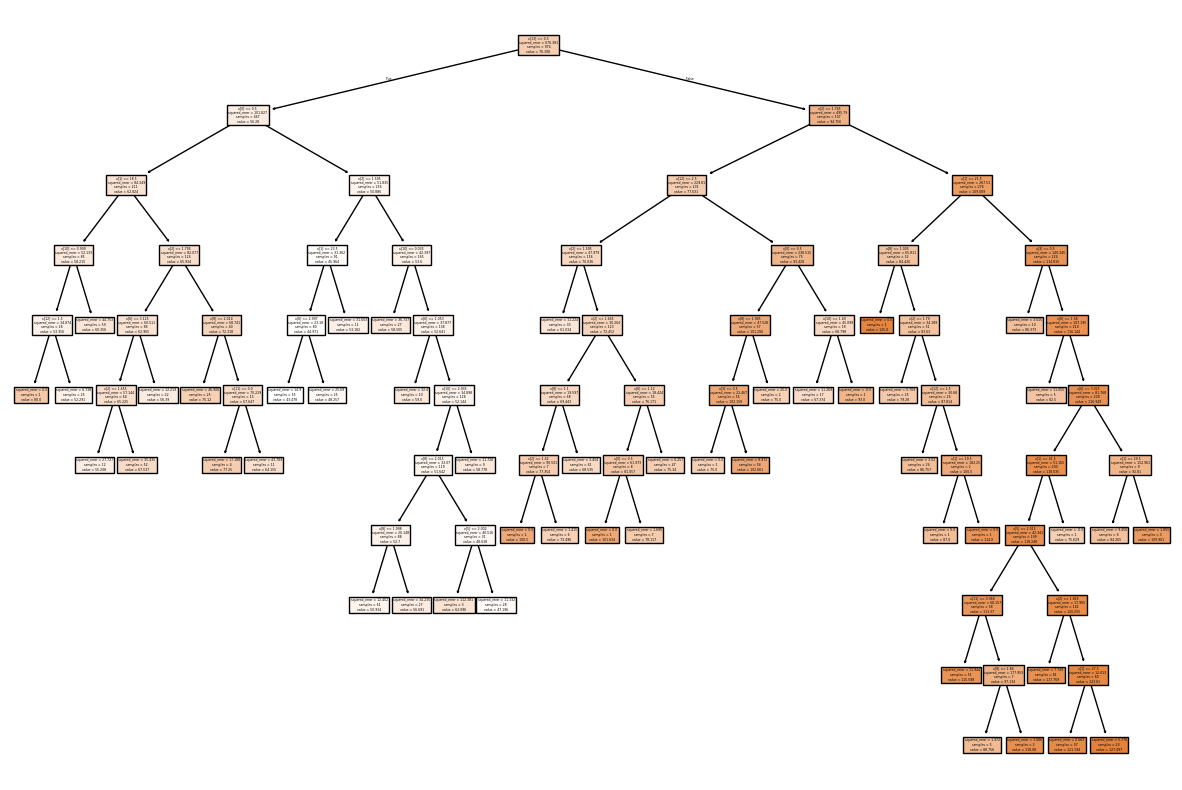

In [8]:
# Apartado 3
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

# Crear un árbol de regresión y entrenarlo
reg = DecisionTreeRegressor(max_depth=None, min_samples_split=2)
reg.fit(X_train, y_train)

# Verificar si es necesario hacer poda y cuál sería el mejor parámetro para realizarla
param_grid = {'ccp_alpha': np.arange(0, 1, 0.01)}
grid = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Mejor parámetro: ", grid.best_params_)

# Dibujar el árbol creado con poda si esta fuera necesaria
if grid.best_params_['ccp_alpha'] > 0:
    reg_poda = DecisionTreeRegressor(max_depth=None, ccp_alpha=grid.best_params_['ccp_alpha'], random_state=246)
    reg_poda.fit(X_train, y_train)
    
    plt.figure(figsize=(15,10))
    plot_tree(reg_poda, filled=True)
    plt.show()

In [15]:
# Apartado 4
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predecir las etiquetas para el conjunto de prueba
y_pred = reg.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

ValueError: continuous is not supported

In [16]:
# Apartado 5

# Crear y entrenar el árbol de decisión con poda
reg_poda = DecisionTreeRegressor(ccp_alpha=grid.best_params_['ccp_alpha'])
reg_poda.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred_poda = reg_poda.predict(X_test)

# Calcular las métricas
accuracy_poda = accuracy_score(y_test, y_pred_poda)
precision_poda = precision_score(y_test, y_pred_poda)
recall_poda = recall_score(y_test, y_pred_poda)
f1_poda = f1_score(y_test, y_pred_poda)

print(f"Accuracy: {accuracy_poda:.4f}")
print(f"Precision: {precision_poda:.4f}")
print(f"Recall: {recall_poda:.4f}")
print(f"F1 Score: {f1_poda:.4f}")

ValueError: continuous is not supported

### Ejercicio 2

Utilizando el dataset OBESIDAD.csv, crea el random forest que consideres para realizar la clasificación de la columna OBESIDAD. Para ello, sigue los siguientes pasos:
   1. Carga el dataset y revisa los tipos de datos de los atributos para analizar si es necesario transformar alguno. En caso necesario realiza la transformación.
   2. Crea un hold-out (train-test) 80-20
   3. Crea un modelo random forest, estableciendo al menos 4 parámetros.
   4. Calcula al menos 4 métricas en el conjunto de test. Tras el cálculo de las métricas analiza los resultados. 
   5. Realiza una búsqueda de los mejores parámetros.
   6. Compara los resultados del  ensamble random forest con los méjores parámetros en el conjunto de test y con los parámetros establecidos inicialmente. Analiza los resultados e indica cuáles son los principales cambios en los parámetros y el porqué mejora o empeora el resultado.
   7. En base a los resultados obtenidos en los apartados anteriores ¿El modelo de Random Forest sería un modelo, estable robusto y recomendable para la obesidad de los pacientes?

   

In [ ]:
# Apartado 1

# Cargamos de nuevo los datos
df = pd.read_csv("OBESIDAD.csv", sep=";")

# La columna "ALCOHOL" es de tipo categórica, vamos a corregirla

encoder = LabelEncoder()

df['ALCOHOL'] = encoder.fit_transform(df["ALCOHOL"])

print(df.dtypes)

GENERO          int64
EDAD            int64
ALTURA        float64
PESO          float64
HISTORIAL       int64
CBASURA         int64
NVEGETALES    float64
NCOMIDAS      float64
FUMAS           int64
LAGUA         float64
CCALORIAS     float64
EJERCICIO     float64
TECNOLOGIA    float64
ALCOHOL         int64
OBESIDAD        int64
dtype: object


In [ ]:
# Apartado 2
X = df.drop(columns="PESO", axis=1)
y = df["PESO"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)

In [ ]:
# Apartado 3
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=0, min_samples_split=2)

In [ ]:
# Apartado 4
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Apartado 4

rf.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular y mostrar las métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 129.31078667037062
Mean Absolute Error: 9.266535398056044


Son valores considerables para tratarse del MSE y del MAE

In [ ]:
# Apartado 5
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que quieres buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Ajustar el objeto GridSearchCV a los datos
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Apartado 6

# Crear y entrenar el modelo con los mejores parámetros
rf_best = RandomForestRegressor(**grid_search.best_params_, random_state=0)
rf_best.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred_best = rf_best.predict(X_test)

# Calcular y mostrar las métricas para el modelo con los mejores parámetros
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
print(f'Mejor modelo - Mean Squared Error: {mse_best}')
print(f'Mejor modelo - Mean Absolute Error: {mae_best}')

Best model - Mean Squared Error: 24.693220094567504
Best model - Mean Absolute Error: 3.019177843278475


```python
# Apartado 7
```
Se puede observar que tanto el MSE como el MAE se ha reducido de forma considerable, por lo que podríamos concluir que el Random Forest si es un buen modelo para la obesidad en pacientes.